# Total crime with 2020

## Part 1: Data Preparing

### 1.1 Loading data

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [55]:
df=pd.read_csv(r'crime_with_2020.csv')
df=df.drop(columns=['unemployment_rate','laumt', 'household_income'], axis=1)

In [56]:
display(df)
display(df.info())

,month_year,unempl_rate,month,equipment,expenses,not def,salaries_benefits,median_hhincome,equipment_expenses,police_classified_expenses,vehicle_expenses,transportation_expenses,training_expenses,office_expenses,tech_expenses,total_expenditures,householdincome,population,total_crime
0,2011-12,11.5,12,68754.00,3166515.00,1841257.00,8.986384e+07,52239,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,6.820457e+08,52584.00,9905970,16246.00
1,2012-01,11.9,1,27689.38,3869464.53,2653623.36,8.936533e+07,52929,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,1.034241e+08,52641.50,9910880,17010.00
2,2012-02,11.6,2,107109.00,2762364.72,1916591.92,9.007370e+07,52929,432970.93,477393.53,316012.87,986593.93,6236.58,222237.23,66705.36,9.619063e+07,52699.00,9915790,15278.00
3,2012-03,11.2,3,17116.37,2867717.35,953555.93,9.015249e+07,52929,424806.70,477393.53,20291.67,986593.93,20730.55,390175.50,44325.45,9.469714e+07,52756.50,9920690,16678.00
4,2012-04,10.5,4,95930.00,2223266.02,2320768.86,1.336938e+08,52929,286486.53,592685.60,59378.08,1800.00,13324.29,280853.86,439.00,1.369942e+08,52814.00,9925600,16261.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2020-02,4.6,2,83830.17,6553924.07,12631144.51,1.254775e+08,74134,305989.83,10854011.04,316012.87,83812.19,5806.53,1354195.35,200204.12,1.303049e+08,60572.24,10039272,17068.52
99,2020-03,6.6,3,15900.81,6706752.35,885194.97,1.332103e+08,74134,587456.58,477393.53,316012.87,141371.08,22651.45,3296416.24,65054.39,1.303049e+08,60572.24,10039272,17068.52
100,2020-04,20.4,4,115483.18,7443089.33,1442179.63,1.236813e+08,74134,747749.23,477393.53,197250.06,416571.76,22651.45,1698142.81,694574.93,1.404097e+08,73946.64,10012600,334.00
101,2020-05,20.8,5,71738.00,6901255.00,4986413.00,1.274564e+08,74134,444079.39,1059.35,316012.87,139644.11,22651.45,1231770.28,339.45,1.432843e+08,74319.18,10009700,315.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 19 columns):
month_year                    103 non-null object
unempl_rate                   103 non-null float64
month                         103 non-null int64
equipment                     103 non-null float64
expenses                      103 non-null float64
not def                       103 non-null float64
salaries_benefits             103 non-null float64
median_hhincome               103 non-null int64
equipment_expenses            103 non-null float64
police_classified_expenses    103 non-null float64
vehicle_expenses              103 non-null float64
transportation_expenses       103 non-null float64
training_expenses             103 non-null float64
office_expenses               103 non-null float64
tech_expenses                 103 non-null float64
total_expenditures            103 non-null float64
householdincome               103 non-null float64
population                    103

None

Generally variable with highest correlation is a good predictor

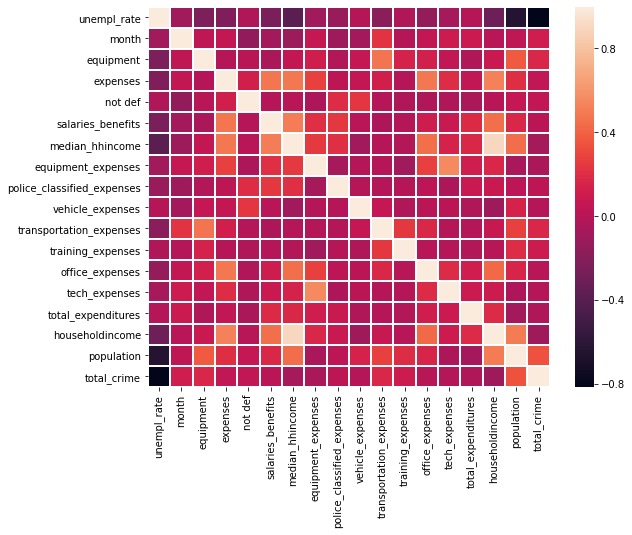

In [57]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(9,7))
a=sns.heatmap(corr,            
    linewidths=1.0)

### 1.2 Simple EDA

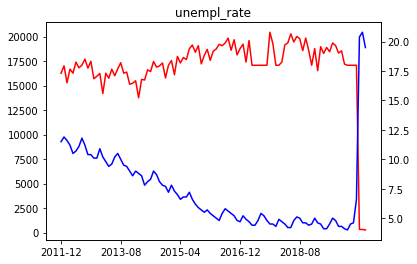

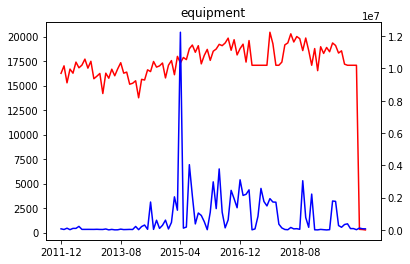

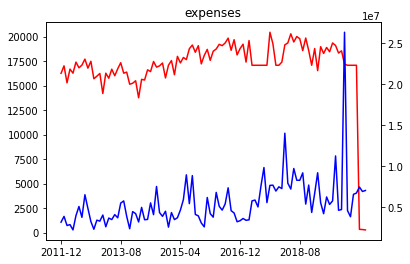

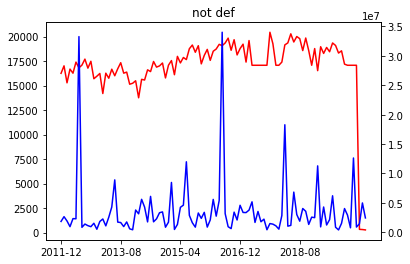

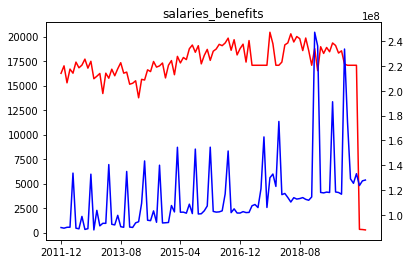

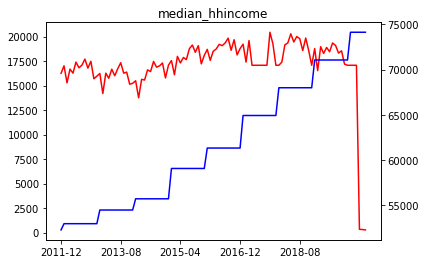

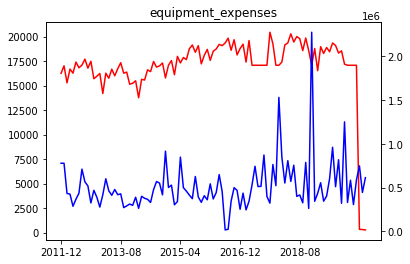

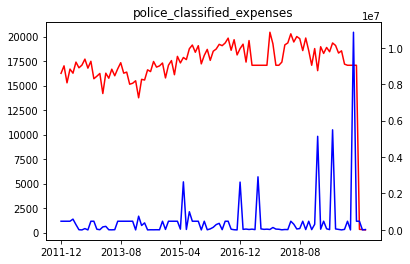

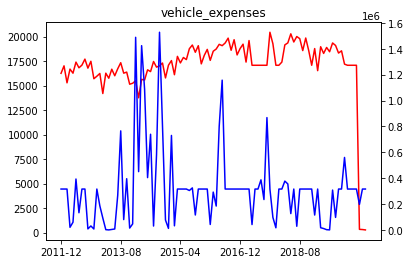

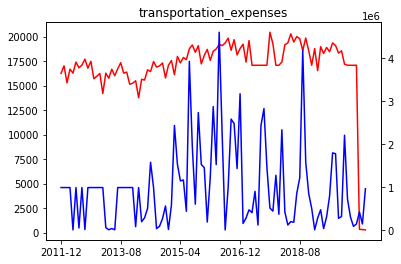

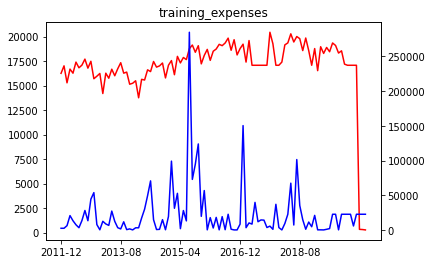

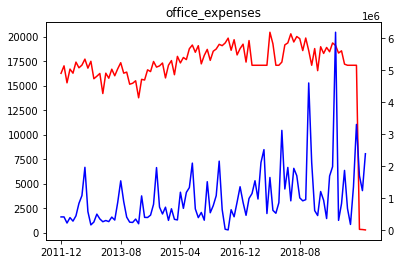

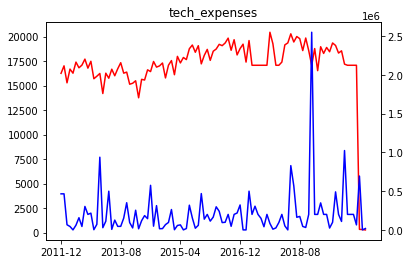

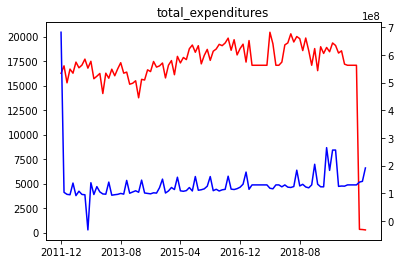

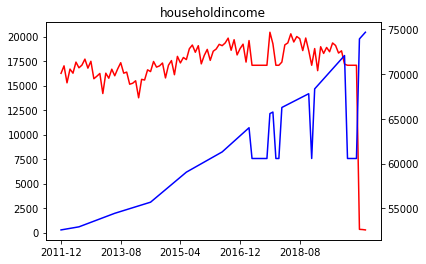

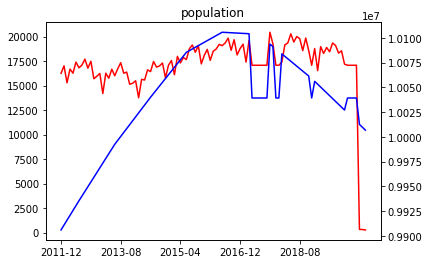

In [58]:
data=df.drop(columns=['month','month_year'])
m=df['month_year']
a=df['total_crime']
i=0
while i <16:
    fig, ax=plt.subplots()
    ax.plot(m, a, color="red")
   
    ax2=ax.twinx()
    ax2.set_xticks([0,20,40,60,80])
    ax2.set_title(data.columns[i])
    ax2.plot(m,data.iloc[:,i].values,color="blue")
    i=i+1    
    plt.show()


## Part 2: Model

In [59]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42)

In [60]:
features=X.columns

In [61]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X_train)
#for the training set
X_train = scaler.transform(X_train)
#for the test set
X_test = scaler.transform(X_test)

### 2.1 Model: linear regression

In [62]:
from sklearn.metrics import mean_squared_error, r2_score
def results(y_test, y_pred):
    print('mse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2: ', r2_score(y_test, y_pred))

In [63]:
%%time
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
results(y_test, y_pred)
lr.score(X,y)

mse:  1278.367062715454
r2:  0.9067667173666215
Wall time: 4.98 ms


-248451192418518.6

In [64]:
%%time
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_train)
results(y_train, y_pred)

mse:  1170.4850098065133
r2:  0.7826967355468377
Wall time: 968 µs


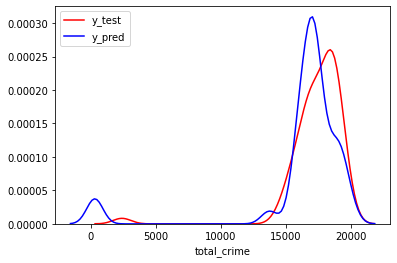

In [65]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

###  2.2.2 variable importance analysis

In [66]:
coe=lr.coef_

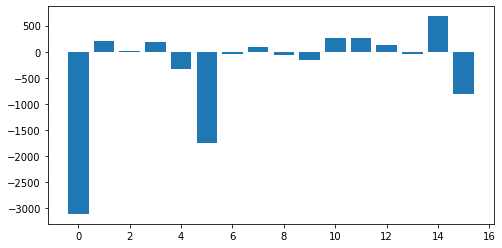

0: unempl_rate
1: equipment
2: expenses
3: not def
4: salaries_benefits
5: median_hhincome
6: equipment_expenses
7: police_classified_expenses
8: vehicle_expenses
9: transportation_expenses
10: training_expenses
11: office_expenses
12: tech_expenses
13: total_expenditures
14: householdincome
15: population


In [67]:
plt.figure(figsize=(8,4))
ax=plt.bar([x for x in range(len(coe))], coe)
plt.show()
for i,j in enumerate(features):
    print('%d: %s'%(i,j))

In [68]:
#sorted importance of variables:
for i,j in sorted(list(zip(features, map(lambda x: round(x, 2), coe))), key=lambda x: x[1]):
    print('%s: %.3f' % (i,j))

unempl_rate: -3111.340
median_hhincome: -1757.640
population: -809.630
salaries_benefits: -324.780
transportation_expenses: -162.420
vehicle_expenses: -68.740
equipment_expenses: -37.810
total_expenditures: -36.600
expenses: 13.790
police_classified_expenses: 92.130
tech_expenses: 119.900
not def: 192.700
equipment: 199.140
training_expenses: 264.780
office_expenses: 267.000
householdincome: 680.470


### Model 2.2: Cross Validation with Linear Regression

In [69]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [70]:
from sklearn.model_selection import KFold

In [71]:
def run_cv(X, y, clf_class):
    score=0
    #construct a kfolds object
    kf=KFold(n_splits=8, shuffle=False)
    y_pred=y.copy()
    clf=clf_class()
    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test=X[train_index], X[test_index]
        y_train, y_test =y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred[test_index]=clf.predict(X_test)
        score=clf.score(X,y)
    return score,y_pred

In [85]:
y_pred.shape

(103,)

In [83]:
score, y_pred=run_cv(X,y,LinearRegression)

In [86]:
results(y, y_pred)

mse:  3513.2367696528954
r2:  -0.20007584546667978


In [84]:
score

-0.06266650783473038

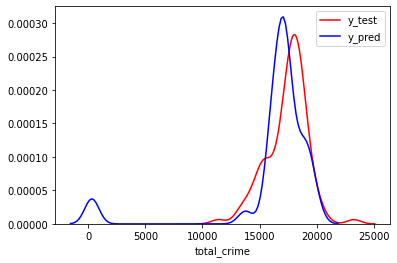

In [79]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.3 XGBoost

In [ ]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [ ]:
%%time
xg=XGBRegressor(n_estimators=10000)
xg.fit(X_train, y_train)
y_xg=xg.predict(X_test)
results(y_test, y_xg)
rmse = np.sqrt(mean_squared_error(y_test, y_xg))
print("RMSE: %f" % (rmse))


In [ ]:
import seaborn as sns
ax1 = sns.distplot(y_xg, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.4: LSTM

In [87]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
X_train=X[:68].values
y_train=y[:68]
X_val=X[68:84].values
y_val=y[68:84]
X_test=X[85:].values
y_test=y[85:]

In [88]:
y_train=np.array(y_train).reshape(68,1)
y_test=np.array(y_test).reshape(18,1)
y_val=np.array(y_val).reshape(16,1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(68, 16) (68, 1) (18, 16) (18, 1) (16, 16) (16, 1)


In [89]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val=X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))

In [90]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [91]:
# design network
# first CONV => RELU => CONV => RELU => POOL layer set
model = Sequential()
model.add(LSTM(300, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization(axis=1))
model.add(Dense(1, activation='relu'))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 300)               380400    
_________________________________________________________________
batch_normalization (BatchNo (None, 300)               1200      
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 381,901
Trainable params: 381,301
Non-trainable params: 600
_________________________________________________________________


In [92]:
# fit network
history = model.fit(X_train, y_train, epochs=700, batch_size=5, validation_data=(X_val, y_val), verbose=2, shuffle=False)

Epoch 1/700
14/14 - 0s - loss: 17192.5488 - val_loss: 18770.7363
Epoch 2/700
14/14 - 0s - loss: 17192.2207 - val_loss: 18770.2773
Epoch 3/700
14/14 - 0s - loss: 17191.7246 - val_loss: 18769.6406
Epoch 4/700
14/14 - 0s - loss: 17191.0625 - val_loss: 18768.8301
Epoch 5/700
14/14 - 0s - loss: 17190.2129 - val_loss: 18767.8418
Epoch 6/700
14/14 - 0s - loss: 17189.1582 - val_loss: 18766.6465
Epoch 7/700
14/14 - 0s - loss: 17187.8730 - val_loss: 18765.2188
Epoch 8/700
14/14 - 0s - loss: 17186.3184 - val_loss: 18763.5703
Epoch 9/700
14/14 - 0s - loss: 17184.4688 - val_loss: 18761.6465
Epoch 10/700
14/14 - 0s - loss: 17182.3164 - val_loss: 18759.4141
Epoch 11/700
14/14 - 0s - loss: 17179.8438 - val_loss: 18756.8594
Epoch 12/700
14/14 - 0s - loss: 17177.0449 - val_loss: 18753.9824
Epoch 13/700
14/14 - 0s - loss: 17173.9102 - val_loss: 18750.7617
Epoch 14/700
14/14 - 0s - loss: 17170.4336 - val_loss: 18747.2090
Epoch 15/700
14/14 - 0s - loss: 17166.6211 - val_loss: 18743.3125
Epoch 16/700
14/14 

Epoch 125/700
14/14 - 0s - loss: 15055.2354 - val_loss: 16623.6348
Epoch 126/700
14/14 - 0s - loss: 15023.3203 - val_loss: 16591.6641
Epoch 127/700
14/14 - 0s - loss: 14991.2080 - val_loss: 16559.4980
Epoch 128/700
14/14 - 0s - loss: 14958.9043 - val_loss: 16527.1387
Epoch 129/700
14/14 - 0s - loss: 14926.4023 - val_loss: 16494.5840
Epoch 130/700
14/14 - 0s - loss: 14893.7100 - val_loss: 16461.8359
Epoch 131/700
14/14 - 0s - loss: 14860.8213 - val_loss: 16428.8965
Epoch 132/700
14/14 - 0s - loss: 14827.7432 - val_loss: 16395.7656
Epoch 133/700
14/14 - 0s - loss: 14794.4727 - val_loss: 16362.4443
Epoch 134/700
14/14 - 0s - loss: 14761.0137 - val_loss: 16328.9307
Epoch 135/700
14/14 - 0s - loss: 14727.3604 - val_loss: 16295.2266
Epoch 136/700
14/14 - 0s - loss: 14693.5186 - val_loss: 16261.3330
Epoch 137/700
14/14 - 0s - loss: 14659.4893 - val_loss: 16227.2549
Epoch 138/700
14/14 - 0s - loss: 14625.2705 - val_loss: 16192.9844
Epoch 139/700
14/14 - 0s - loss: 14590.8643 - val_loss: 16158.

Epoch 248/700
14/14 - 0s - loss: 9814.8184 - val_loss: 11377.8330
Epoch 249/700
14/14 - 0s - loss: 9762.2979 - val_loss: 11325.2744
Epoch 250/700
14/14 - 0s - loss: 9709.6279 - val_loss: 11272.5635
Epoch 251/700
14/14 - 0s - loss: 9656.8105 - val_loss: 11219.7061
Epoch 252/700
14/14 - 0s - loss: 9603.8438 - val_loss: 11166.7021
Epoch 253/700
14/14 - 0s - loss: 9550.7295 - val_loss: 11113.5488
Epoch 254/700
14/14 - 0s - loss: 9497.4668 - val_loss: 11060.2480
Epoch 255/700
14/14 - 0s - loss: 9444.0586 - val_loss: 11006.7998
Epoch 256/700
14/14 - 0s - loss: 9390.5010 - val_loss: 10953.2051
Epoch 257/700
14/14 - 0s - loss: 9336.7959 - val_loss: 10899.4619
Epoch 258/700
14/14 - 0s - loss: 9282.9443 - val_loss: 10845.5713
Epoch 259/700
14/14 - 0s - loss: 9228.9453 - val_loss: 10791.5361
Epoch 260/700
14/14 - 0s - loss: 9174.8018 - val_loss: 10737.3584
Epoch 261/700
14/14 - 0s - loss: 9120.5088 - val_loss: 10683.0322
Epoch 262/700
14/14 - 0s - loss: 9066.0703 - val_loss: 10628.5576
Epoch 263/

Epoch 374/700
14/14 - 0s - loss: 2194.7380 - val_loss: 3683.4966
Epoch 375/700
14/14 - 0s - loss: 2131.7917 - val_loss: 3616.3696
Epoch 376/700
14/14 - 0s - loss: 2070.4778 - val_loss: 3549.9714
Epoch 377/700
14/14 - 0s - loss: 2011.8344 - val_loss: 3485.1143
Epoch 378/700
14/14 - 0s - loss: 1955.5195 - val_loss: 3420.7810
Epoch 379/700
14/14 - 0s - loss: 1900.7406 - val_loss: 3359.1345
Epoch 380/700
14/14 - 0s - loss: 1847.7389 - val_loss: 3297.5916
Epoch 381/700
14/14 - 0s - loss: 1794.7683 - val_loss: 3235.8403
Epoch 382/700
14/14 - 0s - loss: 1745.6444 - val_loss: 3176.7427
Epoch 383/700
14/14 - 0s - loss: 1700.2314 - val_loss: 3120.0427
Epoch 384/700
14/14 - 0s - loss: 1656.7307 - val_loss: 3064.0576
Epoch 385/700
14/14 - 0s - loss: 1615.2271 - val_loss: 3009.6050
Epoch 386/700
14/14 - 0s - loss: 1577.3691 - val_loss: 2958.0308
Epoch 387/700
14/14 - 0s - loss: 1542.5966 - val_loss: 2907.6755
Epoch 388/700
14/14 - 0s - loss: 1509.6237 - val_loss: 2858.0378
Epoch 389/700
14/14 - 0s 

14/14 - 0s - loss: 1038.2053 - val_loss: 1698.0419
Epoch 501/700
14/14 - 0s - loss: 1038.4347 - val_loss: 1698.1100
Epoch 502/700
14/14 - 0s - loss: 1038.3965 - val_loss: 1698.3599
Epoch 503/700
14/14 - 0s - loss: 1038.1145 - val_loss: 1697.7953
Epoch 504/700
14/14 - 0s - loss: 1037.9205 - val_loss: 1697.0137
Epoch 505/700
14/14 - 0s - loss: 1038.1877 - val_loss: 1697.0406
Epoch 506/700
14/14 - 0s - loss: 1038.1664 - val_loss: 1697.2823
Epoch 507/700
14/14 - 0s - loss: 1037.8555 - val_loss: 1696.7162
Epoch 508/700
14/14 - 0s - loss: 1037.6609 - val_loss: 1695.9348
Epoch 509/700
14/14 - 0s - loss: 1037.9622 - val_loss: 1695.9609
Epoch 510/700
14/14 - 0s - loss: 1037.9409 - val_loss: 1696.2028
Epoch 511/700
14/14 - 0s - loss: 1037.5966 - val_loss: 1695.6351
Epoch 512/700
14/14 - 0s - loss: 1037.7490 - val_loss: 1695.7119
Epoch 513/700
14/14 - 0s - loss: 1037.6467 - val_loss: 1695.8463
Epoch 514/700
14/14 - 0s - loss: 1037.7939 - val_loss: 1696.1649
Epoch 515/700
14/14 - 0s - loss: 1037.1

Epoch 627/700
14/14 - 0s - loss: 1033.2737 - val_loss: 1690.1287
Epoch 628/700
14/14 - 0s - loss: 1032.8457 - val_loss: 1689.5308
Epoch 629/700
14/14 - 0s - loss: 1033.2068 - val_loss: 1690.0808
Epoch 630/700
14/14 - 0s - loss: 1032.7828 - val_loss: 1689.4645
Epoch 631/700
14/14 - 0s - loss: 1033.1394 - val_loss: 1690.0331
Epoch 632/700
14/14 - 0s - loss: 1032.7209 - val_loss: 1689.4004
Epoch 633/700
14/14 - 0s - loss: 1033.0710 - val_loss: 1689.9852
Epoch 634/700
14/14 - 0s - loss: 1032.6578 - val_loss: 1689.3322
Epoch 635/700
14/14 - 0s - loss: 1033.0037 - val_loss: 1689.9388
Epoch 636/700
14/14 - 0s - loss: 1032.5946 - val_loss: 1689.2650
Epoch 637/700
14/14 - 0s - loss: 1032.9342 - val_loss: 1689.8878
Epoch 638/700
14/14 - 0s - loss: 1032.5317 - val_loss: 1689.1985
Epoch 639/700
14/14 - 0s - loss: 1032.6444 - val_loss: 1688.9139
Epoch 640/700
14/14 - 0s - loss: 1032.8350 - val_loss: 1689.6187
Epoch 641/700
14/14 - 0s - loss: 1032.4952 - val_loss: 1688.9567
Epoch 642/700
14/14 - 0s 

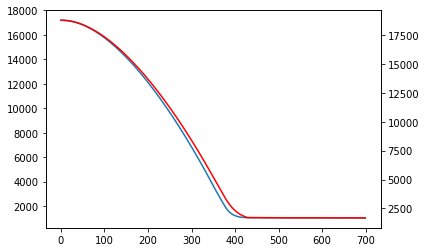

In [93]:
fig,ax = plt.subplots()
ax.plot(history.history['loss'], label='train')
ax2=ax.twinx()
ax2.plot(history.history['val_loss'],'r-',label='loss')
plt.show()

In [94]:
X_test.shape

(18, 1, 16)

In [113]:
# make a prediction
yhat = model.predict(X_test)

In [114]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[2]))

In [115]:
print(y_test.shape, yhat.shape)

(18, 1) (18, 1)


In [116]:
np.mean(X_test-yhat)

21016200.54682726

In [117]:
results(np.max(yhat, axis=1),y_test)

mse:  6964.502946603442
r2:  -374.08913301105895


### 2.5: PCA

In [118]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(X)
p = pd.DataFrame(data = principalComponents
             , columns = ['pc'+str(i) for i in range(1, 9)])
score, y_pred=run_cv(p.values,y,LinearRegression)
score

-0.07892399248240922

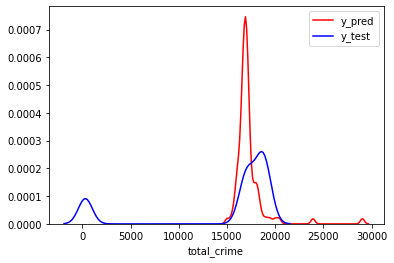

In [119]:
ax1=sns.distplot(y_pred, hist=False, color='r', label='y_pred')
sns.distplot(y_test, hist=False, color='b', label='y_test', ax=ax1)

# Total crime without 2020

## Part 1: Data Preparing

### 1.1 Loading data

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [209]:
df=pd.read_csv(r'crime2.csv')
df=df.drop(columns=['unemployment_rate','laumt', 'household_income'], axis=1)

In [210]:
display(df)
display(df.info())

,month_year,unempl_rate,month,equipment,expenses,not def,salaries_benefits,median_hhincome,equipment_expenses,police_classified_expenses,vehicle_expenses,transportation_expenses,training_expenses,office_expenses,tech_expenses,total_expenditures,householdincome,population,total_crime
0,2011-12,11.5,12,68754.00,3166515.00,1841257.00,8.986384e+07,52239,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,6.820457e+08,52584.00,9905970,16246.00
1,2012-01,11.9,1,27689.38,3869464.53,2653623.36,8.936533e+07,52929,777045.87,477393.53,316012.87,986593.93,2493.95,412057.99,465391.10,1.034241e+08,52641.50,9910880,17010.00
2,2012-02,11.6,2,107109.00,2762364.72,1916591.92,9.007370e+07,52929,432970.93,477393.53,316012.87,986593.93,6236.58,222237.23,66705.36,9.619063e+07,52699.00,9915790,15278.00
3,2012-03,11.2,3,17116.37,2867717.35,953555.93,9.015249e+07,52929,424806.70,477393.53,20291.67,986593.93,20730.55,390175.50,44325.45,9.469714e+07,52756.50,9920690,16678.00
4,2012-04,10.5,4,95930.00,2223266.02,2320768.86,1.336938e+08,52929,286486.53,592685.60,59378.08,1800.00,13324.29,280853.86,439.00,1.369942e+08,52814.00,9925600,16261.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2019-10,4.3,10,165106.01,4701778.26,1518463.55,1.166936e+08,71060,320865.27,2084.29,316012.87,312649.73,22651.45,827555.71,109438.57,1.262587e+08,71711.40,10030000,18542.00
95,2019-11,4.1,11,335171.54,26266990.32,4033056.72,2.335700e+08,71060,1248931.54,29165.92,560197.70,2202090.38,22651.45,1862144.64,1023566.22,1.257695e+08,72083.94,10027100,17184.00
96,2019-12,4.0,12,379276.48,4574301.28,2916517.87,1.749720e+08,71060,330655.48,477393.53,316012.87,717671.66,22651.45,672592.19,200204.12,1.303049e+08,60572.24,10039272,17068.52
97,2020-01,4.5,1,82553.00,3828289.15,757538.97,1.290656e+08,74134,583198.97,154.80,316012.87,299941.85,22651.45,177530.28,200204.12,1.303049e+08,60572.24,10039272,17068.52


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 19 columns):
month_year                    99 non-null object
unempl_rate                   99 non-null float64
month                         99 non-null int64
equipment                     99 non-null float64
expenses                      99 non-null float64
not def                       99 non-null float64
salaries_benefits             99 non-null float64
median_hhincome               99 non-null int64
equipment_expenses            99 non-null float64
police_classified_expenses    99 non-null float64
vehicle_expenses              99 non-null float64
transportation_expenses       99 non-null float64
training_expenses             99 non-null float64
office_expenses               99 non-null float64
tech_expenses                 99 non-null float64
total_expenditures            99 non-null float64
householdincome               99 non-null float64
population                    99 non-null int64
tota

None

Generally variable with highest correlation is a good predictor

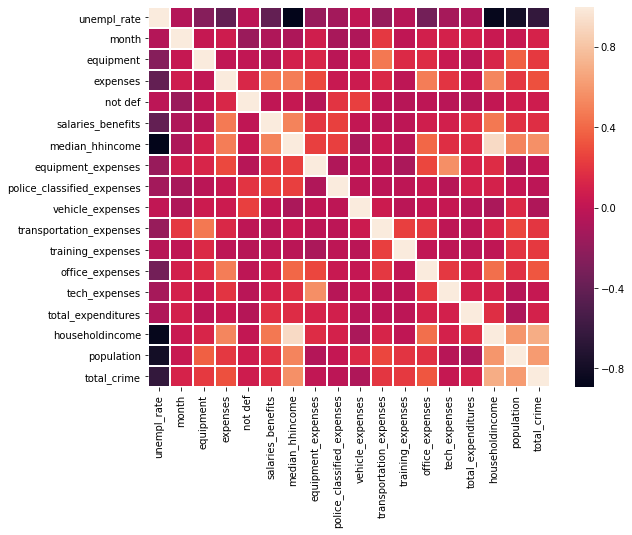

In [211]:
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(9,7))
a=sns.heatmap(corr,            
    linewidths=1.0)

### 1.2 Simple EDA

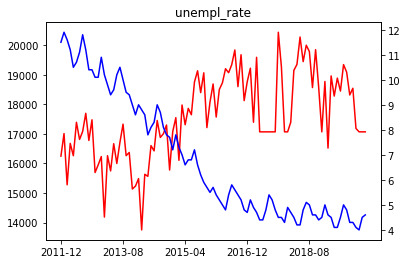

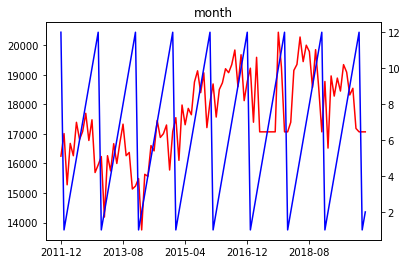

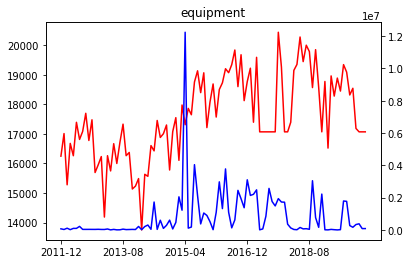

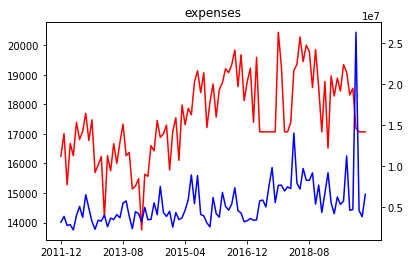

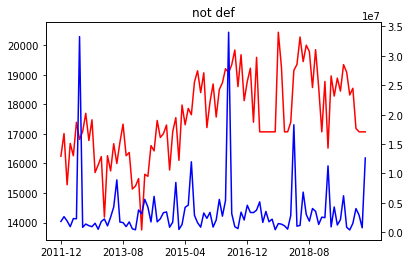

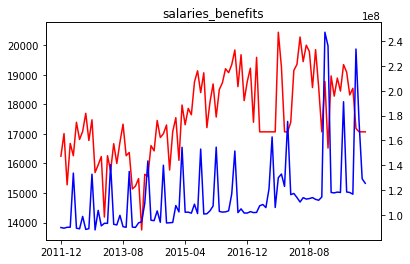

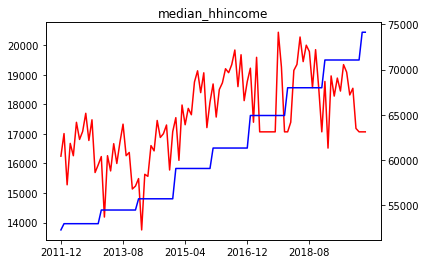

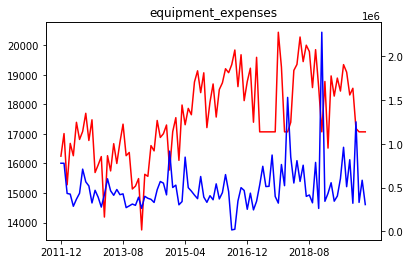

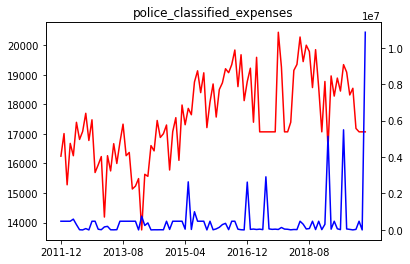

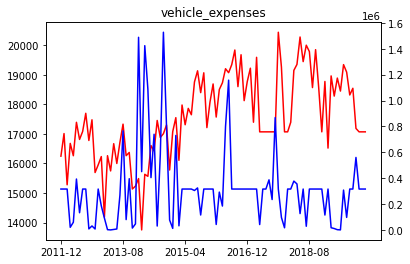

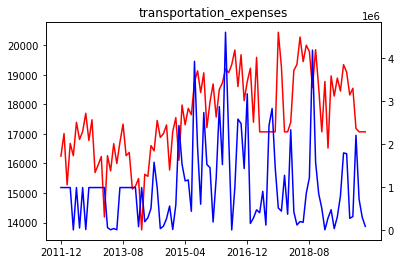

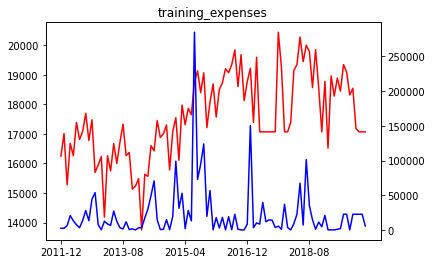

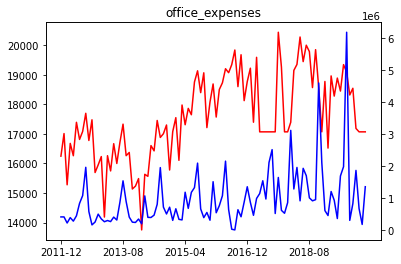

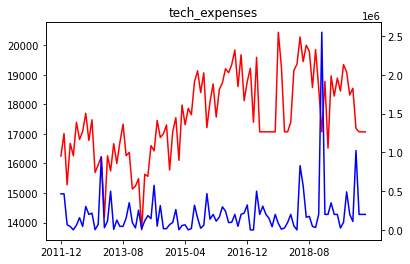

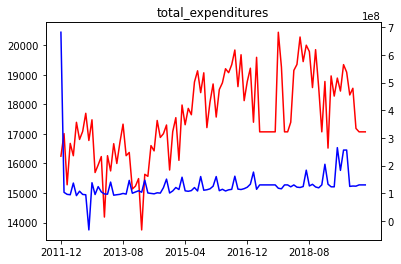

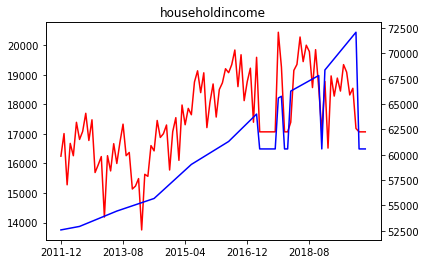

In [212]:
data=df.drop(columns=['month_year'])
m=df['month_year']
a=df['total_crime']
i=0
while i <16:
    fig, ax=plt.subplots()
    ax.plot(m, a, color="red")
   
    ax2=ax.twinx()
    ax2.set_xticks([0,20,40,60,80])
    ax2.set_title(data.columns[i])
    ax2.plot(m,data.iloc[:,i].values,color="blue")
    i=i+1    
    plt.show()


## Part 2: Model

In [213]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month_year','total_crime'], axis=1)
y =df['total_crime']
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33, random_state=42 )

In [214]:
features=X.columns

In [215]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X_train)
#for the training set
X_train = scaler.transform(X_train)
#for the test set
X_test = scaler.transform(X_test)

### 2.1 Model: linear regression

In [216]:
from sklearn.metrics import mean_squared_error, r2_score
def results(y_test, y_pred):
    print('mse: ', np.sqrt(mean_squared_error(y_test, y_pred)))
    print('r2: ', r2_score(y_test, y_pred))

In [217]:
%%time
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
results(y_test, y_pred)
lr.score(X,y)

mse:  1231.2600918763358
r2:  0.01877390608401308
Wall time: 7.49 ms


-158513072776551.5

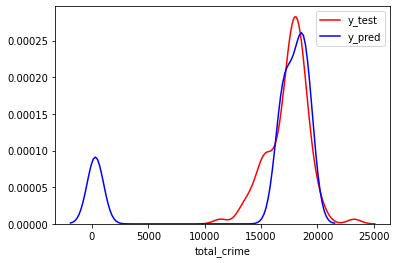

In [96]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

###  2.2.2 variable importance analysis

In [219]:
coe=lr.coef_

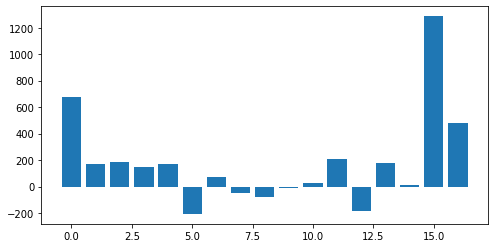

0: unempl_rate
1: month
2: equipment
3: expenses
4: not def
5: salaries_benefits
6: median_hhincome
7: equipment_expenses
8: police_classified_expenses
9: vehicle_expenses
10: transportation_expenses
11: training_expenses
12: office_expenses
13: tech_expenses
14: total_expenditures
15: householdincome
16: population


In [220]:
plt.figure(figsize=(8,4))
ax=plt.bar([x for x in range(len(coe))], coe)
plt.show()
for i,j in enumerate(features):
    print('%d: %s'%(i,j))

In [221]:
#sorted importance of variables:
for i,j in sorted(list(zip(features, map(lambda x: round(x, 2), coe))), key=lambda x: x[1]):
    print('%s: %.3f' % (i,j))

salaries_benefits: -206.650
office_expenses: -184.160
police_classified_expenses: -76.650
equipment_expenses: -48.030
vehicle_expenses: -13.660
total_expenditures: 8.740
transportation_expenses: 24.430
median_hhincome: 74.050
expenses: 150.470
not def: 167.490
month: 171.600
tech_expenses: 179.530
equipment: 185.370
training_expenses: 206.330
population: 477.210
unempl_rate: 676.170
householdincome: 1286.570


### Model 2.2: Cross Validation with Linear Regression

In [222]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X)
X = scaler.transform(X)

In [223]:
from sklearn.model_selection import KFold

In [224]:
def run_cv(X, y, clf_class):
    score=0
    #construct a kfolds object
    kf=KFold(n_splits=8, shuffle=False)
    y_pred=y.copy()
    clf=clf_class()
    #Iterate through folds
    for train_index, test_index in kf.split(X):
        X_train, X_test=X[train_index], X[test_index]
        y_train, y_test =y[train_index], y[test_index]
        clf.fit(X_train, y_train)
        y_pred[test_index]=clf.predict(X_test)
        score=clf.score(X,y)
    return score,y_pred

In [225]:
score, y_pred=run_cv(X,y,LinearRegression)

In [226]:
score

0.2005548482275864

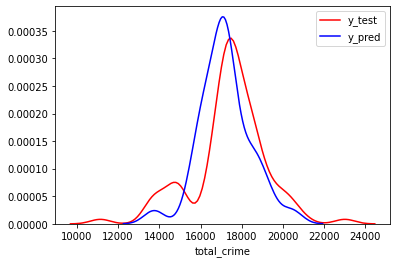

In [227]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.3 XGBoost

In [228]:
import xgboost
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score

In [229]:
%%time
xg=XGBRegressor(n_estimators=10000)
xg.fit(X_train, y_train)
y_xg=xg.predict(X_test)
results(y_test, y_xg)
rmse = np.sqrt(mean_squared_error(y_test, y_xg))
print("RMSE: %f" % (rmse))


mse:  746.68647447483
r2:  0.6391339285091031
RMSE: 746.686474
Wall time: 6.83 s


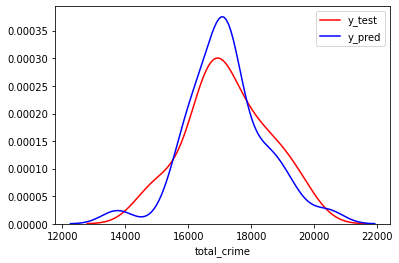

In [230]:
import seaborn as sns
ax1 = sns.distplot(y_xg, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### Model 2.4: LSTM

In [231]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
X_train=X[:55].values
y_train=y[:55]
X_val=X[56:72].values
y_val=y[56:72]
X_test=X[73:].values
y_test=y[73:]

In [232]:
y_val.shape

(16,)

In [233]:
X.shape

(99, 16)

In [234]:
y_train=np.array(y_train).reshape(55,1)
y_test=np.array(y_test).reshape(26,1)
y_val=np.array(y_val).reshape(16,1)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, X_val.shape, y_val.shape)

(55, 16) (55, 1) (26, 16) (26, 1) (16, 16) (16, 1)


In [235]:
# reshape input to be 3D [samples, timesteps, features]
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
X_val=X_val.reshape((X_val.shape[0], 1, X_val.shape[1]))


In [236]:
from keras.models import Sequential
from keras.layers import *
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [237]:
# design network
# first CONV => RELU => CONV => RELU => POOL layer set
model = Sequential()
model.add(LSTM(1000, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(BatchNormalization(axis=1))
model.add(Dense(1, activation='relu'))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1000)              4068000   
_________________________________________________________________
batch_normalization_6 (Batch (None, 1000)              4000      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1001      
Total params: 4,073,001
Trainable params: 4,071,001
Non-trainable params: 2,000
_________________________________________________________________


In [239]:
# fit network
history = model.fit(X_train, y_train, epochs=500, batch_size=5, validation_data=(X_val, y_val), verbose=2, shuffle=False)

Epoch 1/500
11/11 - 0s - loss: 14862.4951 - val_loss: 16235.2324
Epoch 2/500
11/11 - 0s - loss: 14813.3555 - val_loss: 16185.5605
Epoch 3/500
11/11 - 0s - loss: 14763.7031 - val_loss: 16135.3779
Epoch 4/500
11/11 - 0s - loss: 14713.5420 - val_loss: 16084.6895
Epoch 5/500
11/11 - 0s - loss: 14662.8701 - val_loss: 16033.4941
Epoch 6/500
11/11 - 0s - loss: 14611.6904 - val_loss: 15981.7959
Epoch 7/500
11/11 - 0s - loss: 14560.0068 - val_loss: 15929.5938
Epoch 8/500
11/11 - 0s - loss: 14507.8203 - val_loss: 15876.8906
Epoch 9/500
11/11 - 0s - loss: 14455.1318 - val_loss: 15823.6895
Epoch 10/500
11/11 - 0s - loss: 14401.9443 - val_loss: 15769.9912
Epoch 11/500
11/11 - 0s - loss: 14348.2588 - val_loss: 15715.7969
Epoch 12/500
11/11 - 0s - loss: 14294.0781 - val_loss: 15661.1074
Epoch 13/500
11/11 - 0s - loss: 14239.4033 - val_loss: 15605.9277
Epoch 14/500
11/11 - 0s - loss: 14184.2354 - val_loss: 15550.2568
Epoch 15/500
11/11 - 0s - loss: 14128.5762 - val_loss: 15494.0996
Epoch 16/500
11/11 

11/11 - 0s - loss: 5236.9639 - val_loss: 6553.5547
Epoch 127/500
11/11 - 0s - loss: 5134.8364 - val_loss: 6451.0273
Epoch 128/500
11/11 - 1s - loss: 5032.3496 - val_loss: 6348.1455
Epoch 129/500
11/11 - 1s - loss: 4929.5049 - val_loss: 6244.9043
Epoch 130/500
11/11 - 0s - loss: 4826.3047 - val_loss: 6141.3066
Epoch 131/500
11/11 - 1s - loss: 4722.7461 - val_loss: 6037.3521
Epoch 132/500
11/11 - 0s - loss: 4618.8320 - val_loss: 5933.0435
Epoch 133/500
11/11 - 0s - loss: 4514.5625 - val_loss: 5828.3784
Epoch 134/500
11/11 - 0s - loss: 4409.9395 - val_loss: 5723.3579
Epoch 135/500
11/11 - 0s - loss: 4304.9614 - val_loss: 5617.9883
Epoch 136/500
11/11 - 0s - loss: 4199.6313 - val_loss: 5512.2646
Epoch 137/500
11/11 - 0s - loss: 4093.9485 - val_loss: 5406.1875
Epoch 138/500
11/11 - 1s - loss: 3987.9136 - val_loss: 5299.7593
Epoch 139/500
11/11 - 0s - loss: 3881.5278 - val_loss: 5192.9834
Epoch 140/500
11/11 - 1s - loss: 3774.7920 - val_loss: 5085.8584
Epoch 141/500
11/11 - 0s - loss: 3667.7

Epoch 254/500
11/11 - 0s - loss: 961.2473 - val_loss: 1290.2222
Epoch 255/500
11/11 - 0s - loss: 960.9732 - val_loss: 1289.7964
Epoch 256/500
11/11 - 0s - loss: 960.5724 - val_loss: 1288.5779
Epoch 257/500
11/11 - 0s - loss: 960.9897 - val_loss: 1288.6885
Epoch 258/500
11/11 - 0s - loss: 960.4531 - val_loss: 1287.9659
Epoch 259/500
11/11 - 0s - loss: 960.1832 - val_loss: 1287.0718
Epoch 260/500
11/11 - 0s - loss: 960.9630 - val_loss: 1287.8938
Epoch 261/500
11/11 - 0s - loss: 960.4393 - val_loss: 1288.0825
Epoch 262/500
11/11 - 0s - loss: 960.0012 - val_loss: 1287.4500
Epoch 263/500
11/11 - 0s - loss: 960.2516 - val_loss: 1287.4989
Epoch 264/500
11/11 - 0s - loss: 959.8671 - val_loss: 1286.8712
Epoch 265/500
11/11 - 0s - loss: 959.5991 - val_loss: 1285.9822
Epoch 266/500
11/11 - 1s - loss: 959.7054 - val_loss: 1285.8622
Epoch 267/500
11/11 - 1s - loss: 960.1884 - val_loss: 1286.6422
Epoch 268/500
11/11 - 0s - loss: 959.4788 - val_loss: 1286.2452
Epoch 269/500
11/11 - 0s - loss: 959.164

11/11 - 0s - loss: 955.0029 - val_loss: 1267.8187
Epoch 383/500
11/11 - 0s - loss: 954.7540 - val_loss: 1266.6600
Epoch 384/500
11/11 - 0s - loss: 955.2957 - val_loss: 1268.1992
Epoch 385/500
11/11 - 0s - loss: 953.9699 - val_loss: 1264.9604
Epoch 386/500
11/11 - 0s - loss: 955.2382 - val_loss: 1265.9810
Epoch 387/500
11/11 - 0s - loss: 954.6720 - val_loss: 1265.5903
Epoch 388/500
11/11 - 1s - loss: 954.7436 - val_loss: 1265.5759
Epoch 389/500
11/11 - 0s - loss: 954.5645 - val_loss: 1265.3599
Epoch 390/500
11/11 - 0s - loss: 955.3527 - val_loss: 1267.4222
Epoch 391/500
11/11 - 0s - loss: 953.7648 - val_loss: 1263.7533
Epoch 392/500
11/11 - 0s - loss: 954.8416 - val_loss: 1264.4403
Epoch 393/500
11/11 - 1s - loss: 955.0781 - val_loss: 1265.7253
Epoch 394/500
11/11 - 0s - loss: 953.9999 - val_loss: 1263.5513
Epoch 395/500
11/11 - 0s - loss: 954.6098 - val_loss: 1263.7262
Epoch 396/500
11/11 - 0s - loss: 954.6644 - val_loss: 1264.8308
Epoch 397/500
11/11 - 0s - loss: 954.4474 - val_loss: 

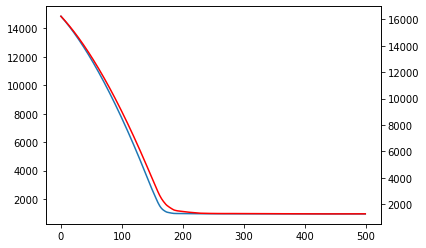

In [240]:
fig,ax = plt.subplots()
ax.plot(history.history['loss'], label='train')
ax2=ax.twinx()
ax2.plot(history.history['val_loss'],'r-',label='loss')
plt.show()

In [189]:
# make a prediction
yhat = model.predict(X_test)
yhat.shape

(26, 1)

In [190]:
X_test=X_test.reshape((X_test.shape[0],X_test.shape[2]))

In [191]:
print(y_test.shape, yhat.shape)

(26, 1) (26, 1)


In [192]:
np.mean(X_test-yhat)

19619053.569203727

In [193]:
results(np.max(yhat, axis=1),y_test)

mse:  8668.230183630667
r2:  -16824.57219216628


### 2.5: PCA

In [194]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['month','month_year','total_crime'], axis=1)
y =df['total_crime']
from sklearn.decomposition import PCA
pca = PCA(n_components=14)
principalComponents = pca.fit_transform(X)
p = pd.DataFrame(data = principalComponents
             , columns = ['pc'+str(i) for i in range(1, 15)])
score, y_pred=run_cv(p.values,y,LinearRegression)
score

0.5275633459611966

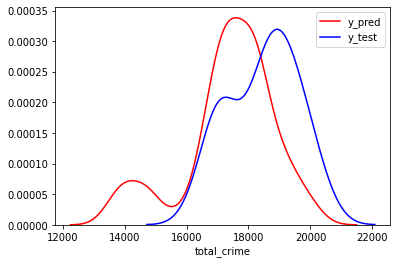

In [195]:
ax1=sns.distplot(y_pred, hist=False, color='r', label='y_pred')
sns.distplot(y_test, hist=False, color='b', label='y_test', ax=ax1)

# Area

These are classification models with area(The dependent variables are the location within the city).

## Part 1: Data preparing

In [509]:
df=pd.read_csv(r'crime_total.csv')

In [510]:
df=df.drop(columns=['weapon','time', 'lat', 'lon', 'month_year', 'crime_rate'], axis=1)

In [511]:
display(df.head())
display(df.info())

,time_class,area,district_number,part,crime_code,age,sex,descent,premis,status,total_crime,total_expenditures,unemployment_rate,householdincome,population
0,morning,Mission,1902,1,420,60,M,W,garage/carport,IC,16246,6.820457e+08,11.5,52584.0,9905.97
1,evening,Rampart,217,2,745,36,M,H,"vehicle, passenger/truck",IC,16246,6.820457e+08,11.5,52584.0,9905.97
2,early_morning,Van Nuys,926,1,220,24,M,W,street,AA,16246,6.820457e+08,11.5,52584.0,9905.97
3,evening,Northeast,1133,1,420,20,M,W,parking lot,IC,16246,6.820457e+08,11.5,52584.0,9905.97
4,early_morning,Pacific,1402,1,330,24,F,O,alley,IC,16246,6.820457e+08,11.5,52584.0,9905.97


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268286 entries, 0 to 1268285
Data columns (total 15 columns):
time_class            1268286 non-null object
area                  1268286 non-null object
district_number       1268286 non-null int64
part                  1268286 non-null int64
crime_code            1268286 non-null int64
age                   1268286 non-null int64
sex                   1268286 non-null object
descent               1268286 non-null object
premis                1268286 non-null object
status                1268286 non-null object
total_crime           1268286 non-null int64
total_expenditures    1268286 non-null float64
unemployment_rate     1268286 non-null float64
householdincome       1268286 non-null float64
population            1268286 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 145.1+ MB


None

### 1.1 label encoding

In [512]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['area'], axis=1)
y =df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
name=np.sort(y)

In [513]:
df['time_class']=df['time_class'].map({'early_morning':0,'morning':1, 'afternoon':2, 'evening':3})

In [514]:
data=df[['area','sex','premis','descent', 'status']]
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
df[['area','sex','premis','descent',  'status']]=data.apply(LabelEncoder().fit_transform)

In [515]:
df.isnull().sum()

time_class            0
area                  0
district_number       0
part                  0
crime_code            0
age                   0
sex                   0
descent               0
premis                0
status                0
total_crime           0
total_expenditures    0
unemployment_rate     0
householdincome       0
population            0
dtype: int64

### 1.2 normalization

In [516]:
from sklearn.model_selection import train_test_split
# split the data into training and test sets
X=df.drop(columns=['area'], axis=1)
y =df['area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print('X_train: ', X_train.shape, '\nX_test:', X_test.shape)

X_train:  (1014628, 14) 
X_test: (253658, 14)


In [517]:
from sklearn.preprocessing import StandardScaler
#standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
scaler = scaler.fit(X_train)
#for the training set
X_train = scaler.transform(X_train)
#for the test set
X_test = scaler.transform(X_test)

In [518]:
np.isnan(X_train).sum()

0

## Part 2: Modeling

### 2.1 Logistic Regression

In [519]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
def results(y_test, y_pred):
    print('MSE', mean_squared_error(y_test, y_pred))
    print('accuracy=',accuracy_score(y_test, y_pred))
    print('classification:\n', classification_report(y_test, y_pred))

In [520]:
from sklearn.linear_model import LogisticRegression

In [521]:
%%time
lg=LogisticRegression()
lg.fit(X_train, y_train)
y_pred=lg.predict(X_test)

Wall time: 3min 14s


C:\Users\Rachel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [522]:
results(y_test.values, y_pred)

MSE 3.416434727073461
accuracy= 0.9435223805281127
classification:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     17804
           1       0.98      0.99      0.99     13244
           2       0.91      0.79      0.84     11123
           3       0.93      0.91      0.92      9339
           4       0.94      0.96      0.95     10189
           5       0.97      0.72      0.82      8448
           6       0.96      1.00      0.98     11680
           7       0.96      0.98      0.97     11966
           8       0.94      0.96      0.95     13570
           9       0.94      0.95      0.94     11028
          10       0.93      0.94      0.94     11246
          11       0.98      0.95      0.96     11275
          12       0.96      0.92      0.94     12718
          13       0.99      0.94      0.97     11231
          14       0.86      0.95      0.90     13640
          15       0.89      0.99      0.94     17464
          16 

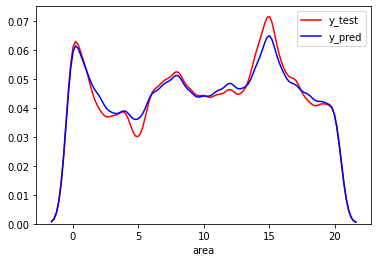

In [523]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

In [ ]:
sns.barplot(x=feature_imp, y=feature_imp.index)

### 2.2 RandomForest

In [524]:
%%time
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred=RF.predict(X_test)

Wall time: 11min 39s


In [525]:
results(y_test, y_pred)

MSE 1.3843166783622043
accuracy= 0.9746706194955412
classification:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98     17804
           1       1.00      1.00      1.00     13244
           2       0.97      0.98      0.97     11123
           3       0.97      0.96      0.97      9339
           4       0.94      0.98      0.96     10189
           5       1.00      0.95      0.97      8448
           6       0.96      0.96      0.96     11680
           7       0.99      0.99      0.99     11966
           8       0.97      0.99      0.98     13570
           9       0.98      0.97      0.98     11028
          10       0.94      0.98      0.96     11246
          11       1.00      1.00      1.00     11275
          12       0.98      0.97      0.98     12718
          13       1.00      1.00      1.00     11231
          14       1.00      0.98      0.99     13640
          15       1.00      1.00      1.00     17464
          16

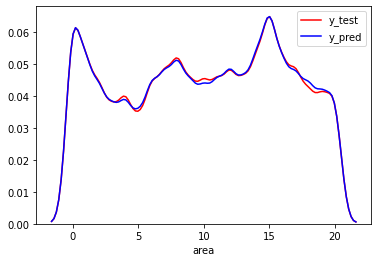

In [526]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)

### 2.3 KNN

In [527]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time
KNN= KNeighborsClassifier()
KNN.fit(X_train, y_train)
y_pred=KNN.predict(X_test)

In [ ]:
results(y_test, y_pred)

In [ ]:
import seaborn as sns
ax1 = sns.distplot(y_pred, hist=False, color="r", label="y_test")
sns.distplot(y_test, hist=False, color="b", label="y_pred" , ax=ax1)